<a href="https://colab.research.google.com/github/mariemtouihri/GRAM-Metric/blob/main/Betweeness_Centrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Import libraries and data

In [ ]:
import numpy as np
import networkx as nx
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
  Load all matrices from my drive in a dictionary (There are 8 Groups of matrices,
   each time we will work with a specific group in all cells and then repeat all
    of it to the next group)

"""

# Read the adjacency matrix
loaded_data_dict = {}
noises = [i for i in range(0,110,10)]
j = 1 # To select G1 and so on (it will be applied on all other cells)

for noise in noises:
  file_path = f'/content/drive/MyDrive/Colab_Notebooks/matrices_noise_G{j}_{noise}%.npy'
  loaded_data = np.load(file_path)
  loaded_data_dict[noise] = loaded_data

print(f"Matrices G{j} are loaded successfully!")

In [ ]:
len(loaded_data_dict[0])

### To verify percentage of modification for the loaded matrices

In [ ]:
# Calculate the percentage of modification
def calculate_modification_percentage(original_matrix, modified_matrix):
    total_elements = original_matrix.size
    modified_elements = np.count_nonzero(original_matrix != modified_matrix)
    modification_percentage = (modified_elements / (total_elements-original_matrix.shape[0])) * 100
    return modification_percentage

original_matrix = loaded_data_dict[0][200]  #insert a specific  matrix here
modified_matrix = loaded_data_dict[30][200]  # You must get 30% noise result

# Calculate and print the modification percentage
percentage = calculate_modification_percentage(original_matrix, modified_matrix)
print(f"Percentage of modification: {percentage:.2f}%")


### Define needed functions

In [ ]:
def betweenness (matrices):

    betweenness_values = []
    for i in range(len(matrices)):
      matrix = matrices[i]
      G = nx.DiGraph(matrix)
      betweenness_v = nx.betweenness_centrality(G, weight='weight', normalized=True)


      betweenness_list = list(betweenness_v.values())
      betweenness_values.extend(betweenness_list)

    return betweenness_values

In [ ]:
# This metric works on node level ! (it is different from metrics that work on graph level)
def calculate_correlations(original_values, modified_values, j, x):
  p = []
  sp = []
  ktau = []
  corr_dict = {}
  for i in range(0, len(original_values), 90):
    # Calculate Pearson Correlation
    p_correlation = np.corrcoef(original_values[i:i+90], modified_values[i:i+90])[0, 1]
    p.append(p_correlation)

    # Calculate Spearman correlation
    sp_correlation, _ = spearmanr(original_values[i:i+90], modified_values[i:i+90])
    sp.append(sp_correlation)

    # Calculate Kendall Tau correlation
    ktau_correlation, p_value = kendalltau(original_values[i:i+90], modified_values[i:i+90])
    ktau.append(ktau_correlation)


  # Store correlation results to a json file for each matrix
  corr_dict['pearson_values'] = p
  corr_dict['spearman_values'] = sp
  corr_dict['ktau_values'] = ktau


  # Define the file path for the new JSON file
  file_path = f'/content/drive/MyDrive/Colab_Notebooks/betweenness/betweenness_all_correlations_matrices_G{j}_{x}%.json'

  # Serialize and save the dictionary to the new file
  with open(file_path, 'w') as json_file:
      json.dump(corr_dict, json_file)

  print(f"Results saved to {file_path}")




  # Calculate avg of correlations of all matrices
  pearson_value = np.mean(p, axis=0)
  spearman_value = np.mean(sp, axis=0)
  ktau_value = np.mean(ktau, axis=0)

  return pearson_value, spearman_value, ktau_value

### Start calculations and save them to files


In [ ]:
loaded_data_dict = {}
noises = [i for i in range(0,110,10)]

# To select G1 and so on (it will be applied on all other cells)

for j in range(1,9,1):

  for noise in noises:
    file_path = f'/content/drive/MyDrive/Colab_Notebooks/Copie de matrices_noise_G{j}_{noise}%.npy'
    loaded_data = np.load(file_path)
    loaded_data_dict[noise] = loaded_data

  print(f"Matrices G{j} are loaded successfully!")





  betweenness_dict = {} # to store results in a dictionary

  for percent, loaded_data in loaded_data_dict.items():
      betweenness_dict[percent] = betweenness(loaded_data)


  # store results in an .npy file

  dict_values = list(betweenness_dict.values())
  dict_array = np.array(dict_values)

  file_path = f'/content/drive/MyDrive/Colab_Notebooks/betweenness/betweenness_values_matrices_G{j}.npy'

  np.save(file_path, dict_array)
  print(f"Values G{j} are saved.")

In [ ]:
# To select 25 out of 100 for each matrix
my_list = [i for i in range(99000)]
l=[]
for i in range(0,90001,9000):
  l.extend(my_list[i:i+2250])


for j in range(1,9,1):

  file_path = f'/content/drive/MyDrive/Colab_Notebooks/betweenness/betweenness_values_matrices_G{j}.npy'
  data = np.load(file_path)
  noises = [ i for i in range(0,110,10)]
  closeness_dict= {}
  i=0
  for noise in noises:

      closeness_dict[noise] = data[i]
      i+=1

  # We have 90 values for 90 nodes
  new = {}
  for noise in noises:
    new[noise] = []
    for i in range(len(l)):
      new[noise].append(closeness_dict[noise][l[i]])

  print(len(new[0]))



  # store results in an .npy file

  dict_values = list(new.values())
  dict_array = np.array(dict_values)
  file_path = f'/content/drive/MyDrive/Colab_Notebooks/betweenness/betweenness_values_matrices_25gen_G{j}.npy'

  np.save(file_path, dict_array)
  print(f"Values 25gen G{j} are saved")


In [ ]:
j=1
file_path = f'/content/drive/MyDrive/Colab_Notebooks/betweenness/betweenness_values_matrices_25gen_G{j}.npy'
data = np.load(file_path)
noises = [ i for i in range(0,110,10)]
betweenness_dict= {}
i=0
for noise in noises:
  betweenness_dict[noise] = data[i]
  i+=1

print(len(betweenness_dict))

In [ ]:
pearson_values = [1]
spearman_values = [1]
ktau_values = [1]

for i in range(10,110,10):
  pearson_value, spearman_value, ktau_value = calculate_correlations(betweenness_dict[0], betweenness_dict[i], i)
  pearson_values.append(pearson_value)
  spearman_values.append(spearman_value)
  ktau_values.append(ktau_value)
  print(f"for {i}% noise (Pearson value: {pearson_value}), (Spearman value: {spearman_value}), (Kendall-tau value: {ktau_value})")




# Store correlation results to a json file for each G

corr_dict = {}
corr_dict['pearson_values'] = pearson_values
corr_dict['spearman_values'] = spearman_values
corr_dict['ktau_values'] = ktau_values


# Define the file path for the new JSON file
file_path = f'/content/drive/MyDrive/Colab_Notebooks/betweenness/betweenness_correlations_matrices_G{j}.json'

# Serialize and save the dictionary to the new file
with open(file_path, 'w') as json_file:
    json.dump(corr_dict, json_file)

print(f"Results saved to {file_path}")


In [ ]:
# Store correlation results to a json file for each G

corr_dict = {}
corr_dict['pearson_values'] = pearson_values
corr_dict['spearman_values'] = spearman_values
corr_dict['ktau_values'] = ktau_values


# Define the file path for the new JSON file
file_path = f'/content/drive/MyDrive/Colab_Notebooks/betweenness/betweenness_correlations_matrices_G{j}.json'

# Serialize and save the dictionary to the new file
with open(file_path, 'w') as json_file:
    json.dump(corr_dict, json_file)

print(f"Results saved to {file_path}")


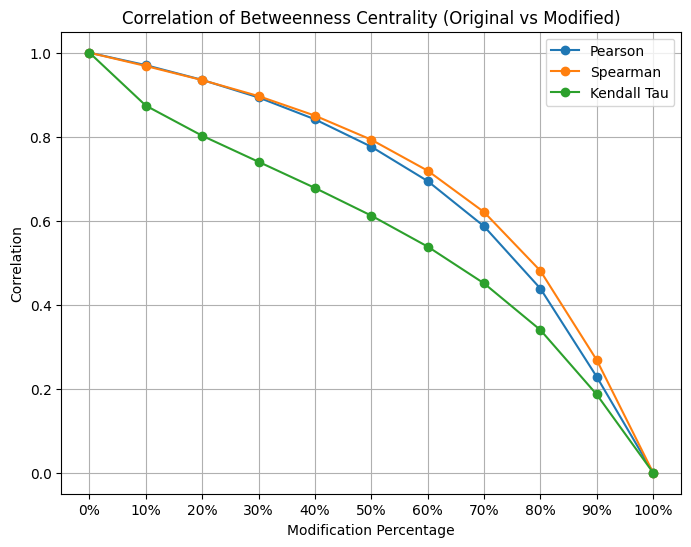

In [ ]:
# read correlations from stored files G1, G2, ..


pearson_values = []
spearman_values = []
ktau_values = []


for j in range(8):

  # Define the path to your JSON file
  file_path = f'/content/drive/MyDrive/Colab_Notebooks/betweenness/betweenness_correlations_matrices_G{j+1}.json'

  # Open and read the JSON file
  with open(file_path, 'r') as json_file:
      corr_dict = json.load(json_file)

      if j== 0:
        pearson_values.extend(corr_dict["pearson_values"])
        spearman_values.extend(corr_dict["spearman_values"])
        ktau_values.extend(corr_dict["ktau_values"])
      else:
        pearson_values = np.vstack((pearson_values, corr_dict["pearson_values"]))
        spearman_values = np.vstack((spearman_values, corr_dict["spearman_values"]))
        ktau_values = np.vstack((ktau_values, corr_dict["ktau_values"]))


# Ready to be plotted (results from all matrices horray!)
pearson_values = np.mean(pearson_values, axis=0)
spearman_values = np.mean(spearman_values, axis=0)
ktau_values = np.mean(ktau_values, axis=0)




# Plot results
modification_rates = [f"{i}%" for i in range(0,110,10)]

plt.figure(figsize=(8, 6))

plt.plot(modification_rates, pearson_values, marker='o', label= "Pearson")
plt.plot(modification_rates, spearman_values, marker='o', label= "Spearman")
plt.plot(modification_rates, ktau_values, marker='o', label= "Kendall Tau")

plt.xlabel("Modification Percentage")
plt.ylabel("Correlation")
plt.title("Correlation of Betweenness Centrality (Original vs Modified)")
plt.legend()
plt.grid(True)
plt.show()
